In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

In [3]:
curve_fit_df = pd.read_csv('alpha_values_MaxC_60000_Grad_0.000405_curve_fit.csv')
curve_fit_df.head(10)

,deme,alpha_outliers,alpha,Curve_Fit
0,1.0,5390.0,NaN,15491.724340
1,2.0,3120.0,NaN,13211.283310
2,3.0,6270.0,NaN,11283.390810
3,4.0,7150.0,NaN,9655.528751
4,5.0,5440.0,NaN,8282.154201
5,6.0,7010.0,7010.0,7123.926796
6,7.0,6210.0,6210.0,6147.003270
7,8.0,5430.0,5430.0,5322.394775
8,9.0,4660.0,4660.0,4625.382982
9,10.0,4120.0,4120.0,4034.991049


In [4]:
input_param_df = pd.read_excel('input_parameters.xlsx')
input_param_df.head()

,food_conc,drift_velocity,c_x_df_l_dc,attr_time_roc,Vo_max
0,0.211633,0.068255,0.022403,6.192934e-07,12.521185
1,0.239944,0.077261,0.025359,7.935055e-07,12.521185
2,0.272042,0.087437,0.028699,1.016293e-06,12.521185
3,0.308433,0.098930,0.032471,1.301007e-06,12.521185
4,0.349693,0.111902,0.036729,1.664580e-06,12.521185


In [5]:
Grad = 0.000405 # µm^-1
# Receptor Probability is the component in the exponential function that's a byproduct of the alpha value and the receptor sensitivity.
# "attr_time_roc" is the time rate of change of receptor (attractant from food) protein bound, = input_param_df['drift_velocity'] * Grad * input_param_df['c_x_df_l_dc']
input_param_df['prob_tum_up'] = np.exp(-1.16 - curve_fit_df['Curve_Fit']*input_param_df['attr_time_roc'])
input_param_df['prob_tum_down'] = np.exp(-1.16 + curve_fit_df['Curve_Fit']*input_param_df['attr_time_roc'])
input_param_df.head()

,food_conc,drift_velocity,c_x_df_l_dc,attr_time_roc,Vo_max,prob_tum_up,prob_tum_down
0,0.211633,0.068255,0.022403,6.192934e-07,12.521185,0.310493,0.316508
1,0.239944,0.077261,0.025359,7.935055e-07,12.521185,0.310217,0.316790
2,0.272042,0.087437,0.028699,1.016293e-06,12.521185,0.309912,0.317102
3,0.308433,0.098930,0.032471,1.301007e-06,12.521185,0.309573,0.317449
4,0.349693,0.111902,0.036729,1.664580e-06,12.521185,0.309194,0.317838


In [6]:
# Create a plot of the alpha values and polynomial fit.

x_values = curve_fit_df['deme']

# create traces
trace0 = go.Scatter(
    x = x_values,
    y = curve_fit_df['alpha'],
    mode = 'markers',
    name = 'alpha value points'
)
# The second trace
trace1 = go.Scatter(
    x = x_values,
    y = curve_fit_df.loc[:4, 'alpha_outliers'],
    mode = 'markers',
    name = 'alpha value outliers'
)
# The third trace
trace2 = go.Scatter(
    x = x_values,
    y = curve_fit_df['Curve_Fit'],
    mode = 'lines',
    name = 'polynomial fit'
)

# create the data
data = [trace0, trace1, trace2]  # assign traces to data

# create the layout
layout = go.Layout(
    title = 'Alpha values and polynomial curve fit.  Outliers are where receptor sensitivity is too low that the program cannot calculate exponentially increasing values.'
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

In [7]:
# Create a plot of the alpha values and polynomial fit.

x_values = curve_fit_df['deme']

# create traces
trace0 = go.Scatter(
    x = x_values,
    y = input_param_df['prob_tum_down'],
    mode = 'lines',
    name = 'probability of tumbling going down gradient'
)
# The second trace
trace1 = go.Scatter(
    x = x_values,
    y = input_param_df['prob_tum_up'],
    mode = 'lines',
    name = 'probability of tumbling going up gradient'
)
# create the data
data = [trace0, trace1]  # assign traces to data

# create the layout
layout = go.Layout(
    title = "probability of tumbling = exp(-d +/- alpha*receptor)"
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

In [8]:
pos_v_time_df = pd.read_excel('pos_v_time_MaxC_60000_Grad_0.000405.xlsx')
pos_v_time_df.head()

,time,position
0,1,1.073275
1,2,11.806026
2,3,19.580715
3,4,20.889535
4,5,12.519627


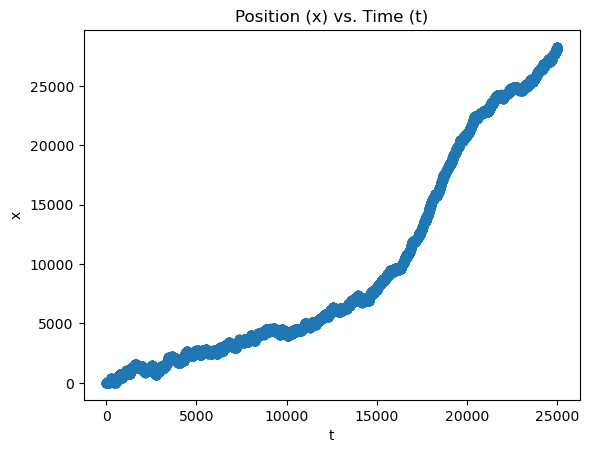

In [16]:
# Check the data to find outliers and to see if the data is normalized.
fig, axes = plt.subplots()
axes.scatter(x=pos_v_time_df['time'], y=pos_v_time_df['position'])
# Customize other aspects of the plot
axes.set_title('Position (x) vs. Time (t)')
axes.set_xlabel('t')
axes.set_ylabel('x')
plt.show()